In [22]:
sig = 'hLLLQkbeegefgghhhahabg_0111022'

In [2]:
load('VeeringGeneralFunctions.sage')

In [5]:
get_LES_boundary_maps(sig)

[(-a0 + 4*a1, a0 + 3*a1), (a0 + 8*a1, a0 + a1)]

In [29]:
cone = get_fibered_cone(sig)
cone.Hilbert_basis()

N(-1, -1),
N( 5, -1),
N( 0, -1),
N( 1, -1),
N( 2, -1),
N( 3, -1),
N( 4, -1)
in 2-d lattice N

In [7]:
get_Thurston_norm(sig)

-6*a1

In [8]:
min_dir = get_minimal_direction(sig)
min_dir

(1.265948638401895, -0.6329743192009475)

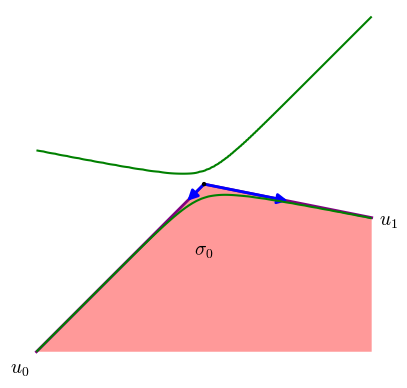

In [9]:
get_fibered_cone_and_levset_plot(sig)

In [10]:
m('cone = ConicHullRegion[{{0, 0}}, {{-1,-1}, {5,-1}, {0,-1}, {1,-1}, {2,-1}, {3,-1}, {4,-1}}]')
m('Reduce[{a, b} \[Element] cone, {a, b}]')

(a <= 0 && b <= a) || (a > 0 && b <= -1/5*a)

In [11]:
m('Reduce[-6*b == n && {a, b} \[Element] cone && n \[Element] Reals, {a, b}]')

((n == 0 && a == 0) || (n > 0 && Inequality[-1/6*n, LessEqual, a, LessEqual, 
    (5*n)/6])) && b == -1/6*n

In [13]:
for n in range(40):
    print('Thurston norm ' + str(n))
    for a in range(-floor(n/6),floor(5*n/6)+1):
        b = (-1/6)*n
        if cone.interior_contains(a,b) and (gcd(a,b) == 1):
            print('\t' + str((a,b)) + ' has genus ' + str(get_genus(sig,(a,b))))

Thurston norm 0
Thurston norm 1
Thurston norm 2
Thurston norm 3
Thurston norm 4
Thurston norm 5
Thurston norm 6
	(0, -1) has genus 3
	(1, -1) has genus 0
	(2, -1) has genus 3
	(3, -1) has genus 0
	(4, -1) has genus 3
Thurston norm 7
Thurston norm 8
Thurston norm 9
Thurston norm 10
Thurston norm 11
Thurston norm 12
	(-1, -2) has genus 3
	(1, -2) has genus 6
	(3, -2) has genus 6
	(5, -2) has genus 6
	(7, -2) has genus 6
	(9, -2) has genus 3
Thurston norm 13
Thurston norm 14
Thurston norm 15
Thurston norm 16
Thurston norm 17
Thurston norm 18
	(-2, -3) has genus 9
	(-1, -3) has genus 9
	(1, -3) has genus 9
	(2, -3) has genus 6
	(4, -3) has genus 9
	(5, -3) has genus 9
	(7, -3) has genus 9
	(8, -3) has genus 9
	(10, -3) has genus 6
	(11, -3) has genus 9
	(13, -3) has genus 9
	(14, -3) has genus 9
Thurston norm 19
Thurston norm 20
Thurston norm 21
Thurston norm 22
Thurston norm 23
Thurston norm 24
	(-3, -4) has genus 9
	(-1, -4) has genus 12
	(1, -4) has genus 12
	(3, -4) has genus 12
	(5, -

In [37]:
def get_prim_int_lattice_pts_on_levset_arr_by_genus(Tnorm):
    # This function gets all the primitive integral points in the interior of the cone
    # on a given level set of the Thurston norm.
    preretval = []
    for a in range(-floor(Tnorm/6),floor(5*Tnorm/6)):
        b = (-1/6)*Tnorm
        if cone.interior_contains(a,b) and (gcd(a,b) == 1):
            preretval.append(((a,b),get_genus(sig,(a,b))))
               
    genuses = [elt[1] for elt in preretval]
    max_genus = max(genuses)
    
    retval = [[] for i in range(max_genus + 1)]
    for elt in preretval:
        retval[elt[1]].append(elt[0])
        
    return retval

In [35]:
def make_point_and_one_tnorm_plot(Tnorm):
    min_dir_arrow = arrow((0, 0), (min_dir[0]*10, min_dir[1]*10), color='cyan')
    picture = min_dir_arrow
    
    pts = get_prim_int_lattice_pts_on_levset_arr_by_genus(Tnorm)
            
    for i in range(len(pts)):
        #picture += points(pts[i], rgbcolor = rainbow(len(pts))[i], size = 50, legend_label='genus ' + str(i), label = i)
        for j in range(len(pts[i])):
            picture += text(str(i), pts[i][j], color = rainbow(len(pts))[i])
    
    Tnorm_levset = line([(4*(Tnorm/6),-Tnorm/6),(-(Tnorm/6),-(Tnorm/6))])
    picture += Tnorm_levset
        
    return picture

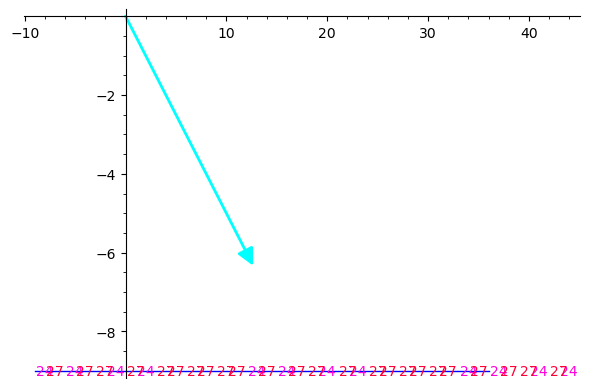

In [48]:
make_point_and_one_tnorm_plot(54)

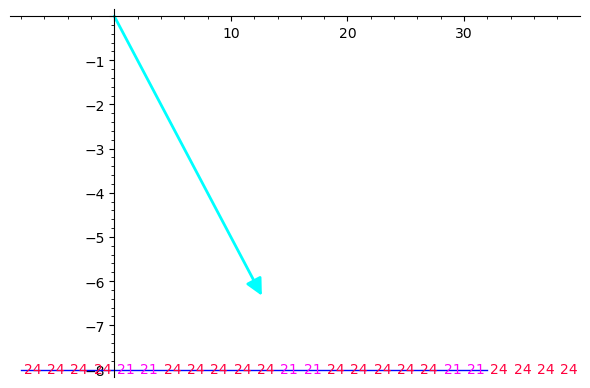

In [47]:
make_point_and_one_tnorm_plot(48)

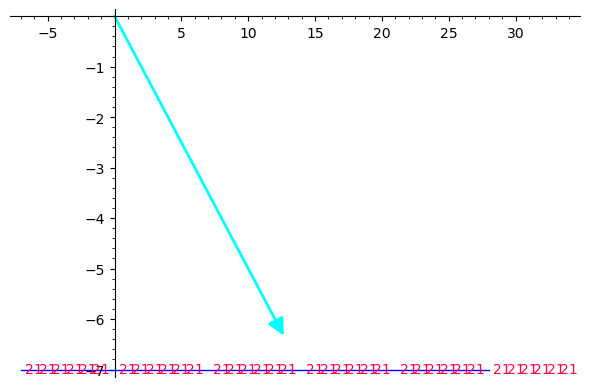

In [46]:
make_point_and_one_tnorm_plot(42)

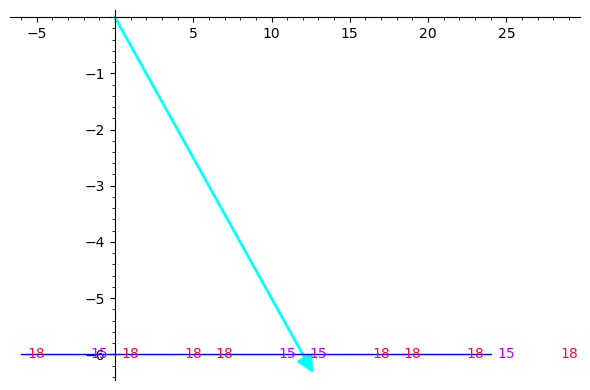

In [45]:
make_point_and_one_tnorm_plot(36)

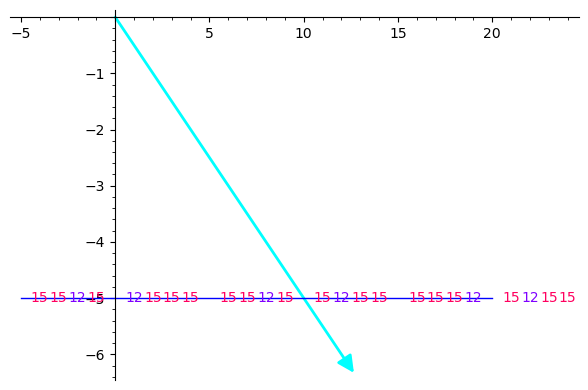

In [44]:
make_point_and_one_tnorm_plot(30)

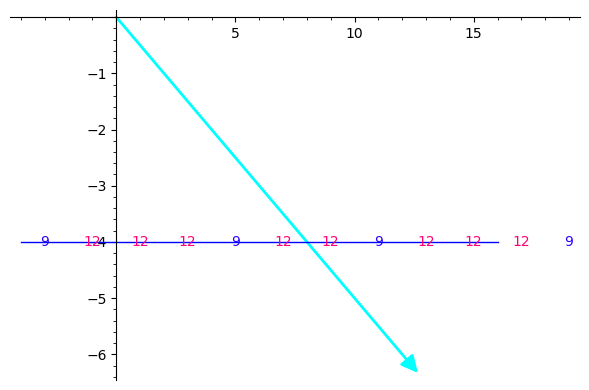

In [40]:
make_point_and_one_tnorm_plot(24)

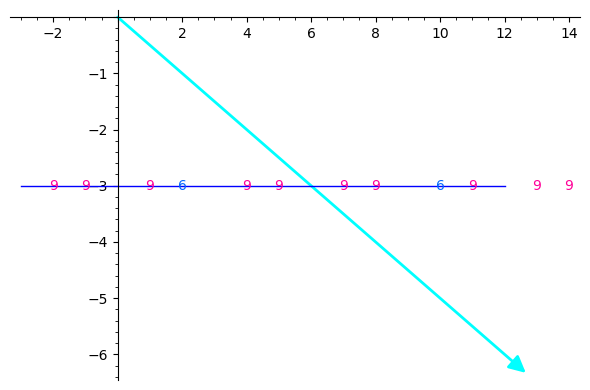

In [41]:
make_point_and_one_tnorm_plot(18)

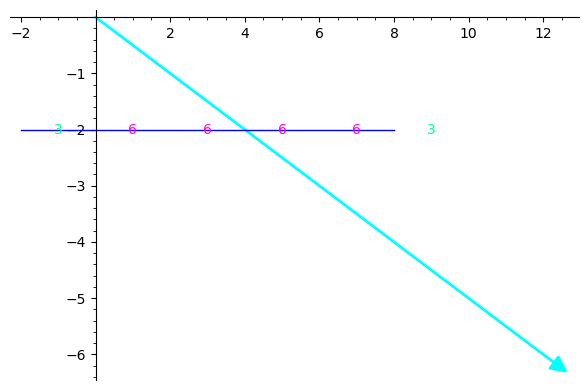

In [42]:
make_point_and_one_tnorm_plot(12)

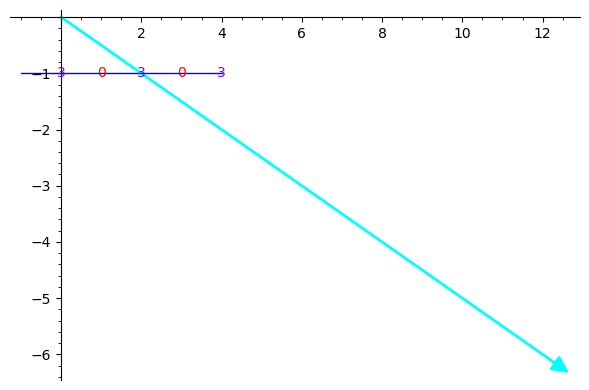

In [43]:
make_point_and_one_tnorm_plot(6)